In [1]:
import pandas as pd
import numpy as np

In [2]:
wine_csv = pd.read_csv("/home/acer/Downloads/winequality-red.csv")

In [3]:
x_df, y_df = wine_csv.drop('quality', axis=1), wine_csv['quality'] 

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
x_df = StandardScaler().fit_transform(x_df)

In [40]:
from sklearn.decomposition import PCA

In [43]:
X_pca = PCA(n_components=2).fit(x_df).transform(x_df)

In [44]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

/home/acer/jupyter/jup_notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/acer/jupyter/jup_notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/acer/jupyter/jup_notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/acer/jupyter/jup_notebook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

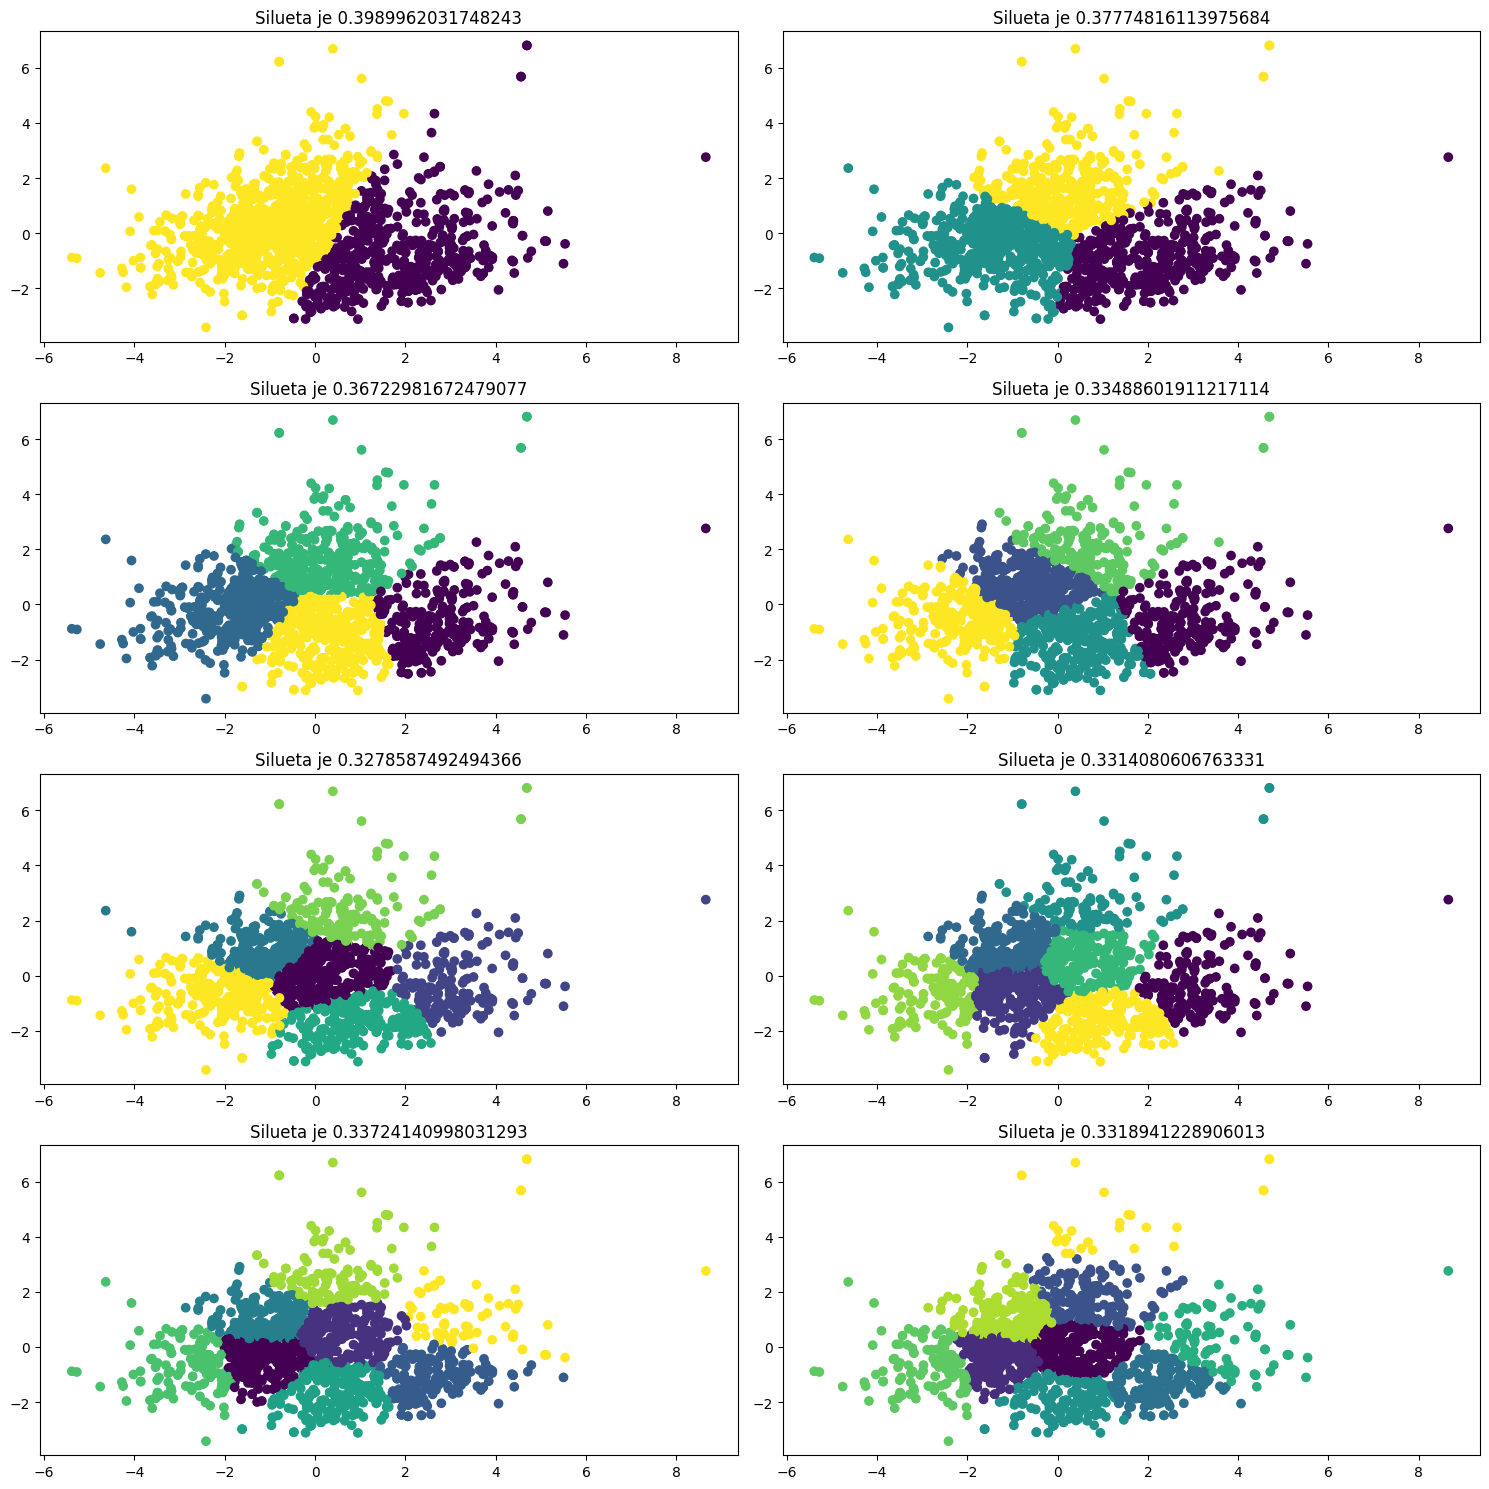

In [50]:
inertia = []
fig = plt.figure(figsize=(15,15))
for idx, k in enumerate(range(2,10)):
    k_means = KMeans(n_clusters=k).fit(X_pca)
    inertia.append(k_means.inertia_)
    fig.add_subplot(len(range(2,10))//2,2,idx+1)
    plt.scatter(X_pca[:,0],X_pca[:,1], marker='o',c=k_means.labels_)
    plt.title(label=f'Silueta je {silhouette_score(X_pca, k_means.labels_)}')
plt.tight_layout()
    